In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/diabetes (1).csv')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df[df.columns])

# Feature scaling
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

# Ensure the target variable is categorical
df['Outcome'] = df['Outcome'].astype(int)

# Splitting the data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\n")


Model: Logistic Regression
Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
[[79 20]
 [18 37]]


Model: Decision Tree
Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Confusion Matrix:
[[78 21]
 [17 38]]


Model: Random Forest
Accuracy: 0.7337662337662337
Classification Report:
              precision    recall  f1-score

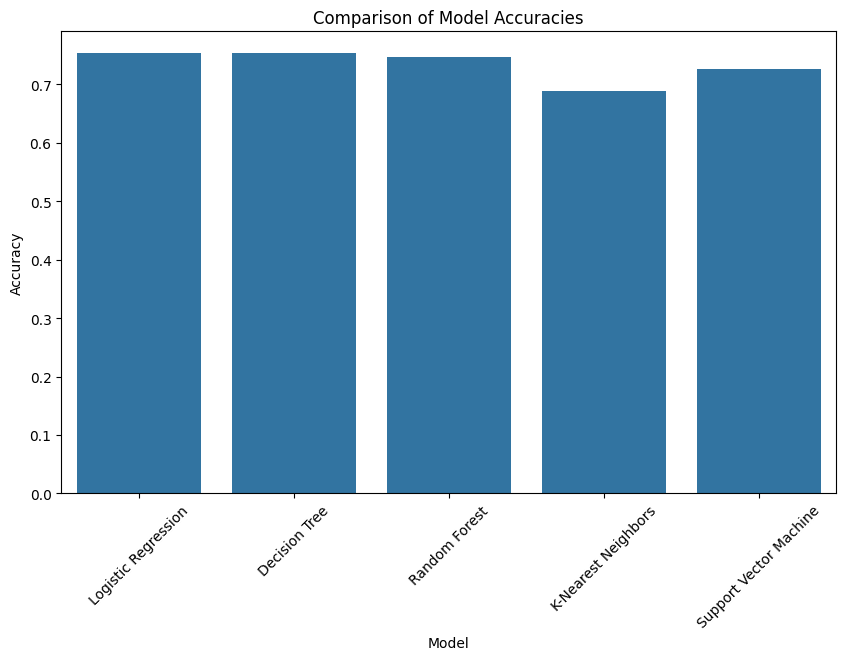

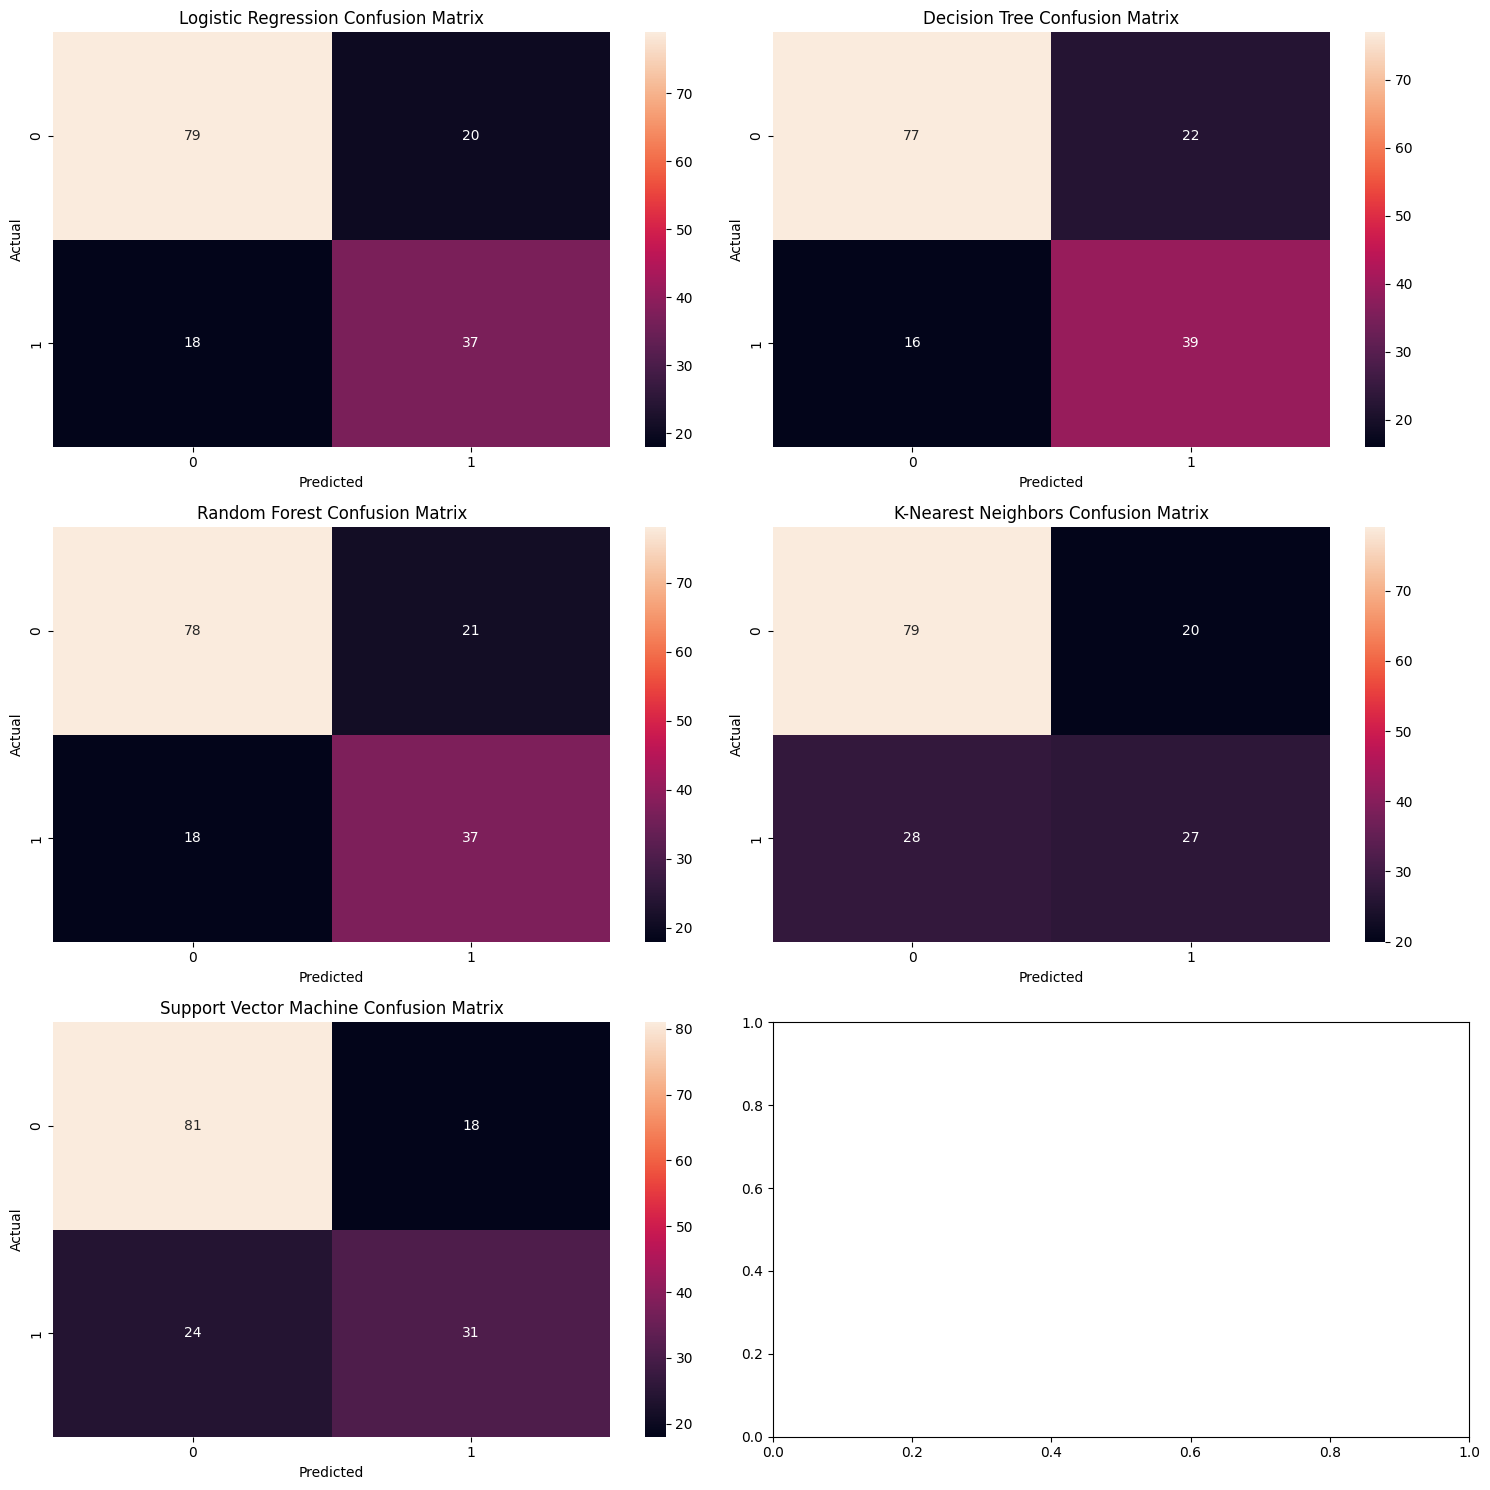

In [ ]:
# Accuracy comparison
accuracies = [results[model]['accuracy'] for model in models]
model_names = list(models.keys())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.show()

# Confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
for i, (name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/diabetes (1).csv')

# Display the first few rows of the dataframe
print(df.head())

# Display summary statistics
print(df.describe())

# Display information about the dataset
print(df.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  # Or use df.fillna() to fill missing values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


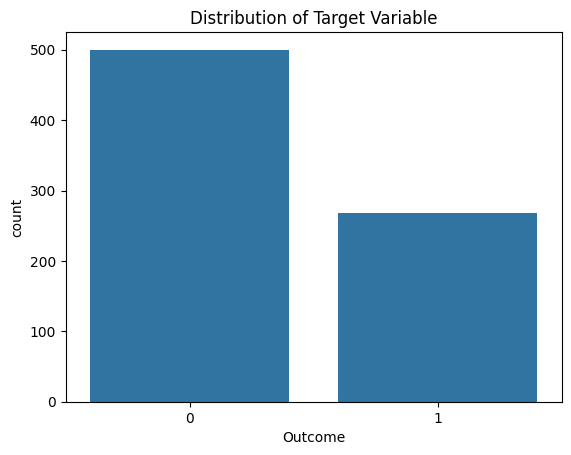

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable (Assuming 'Outcome' is the target variable)
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Target Variable')
plt.show()


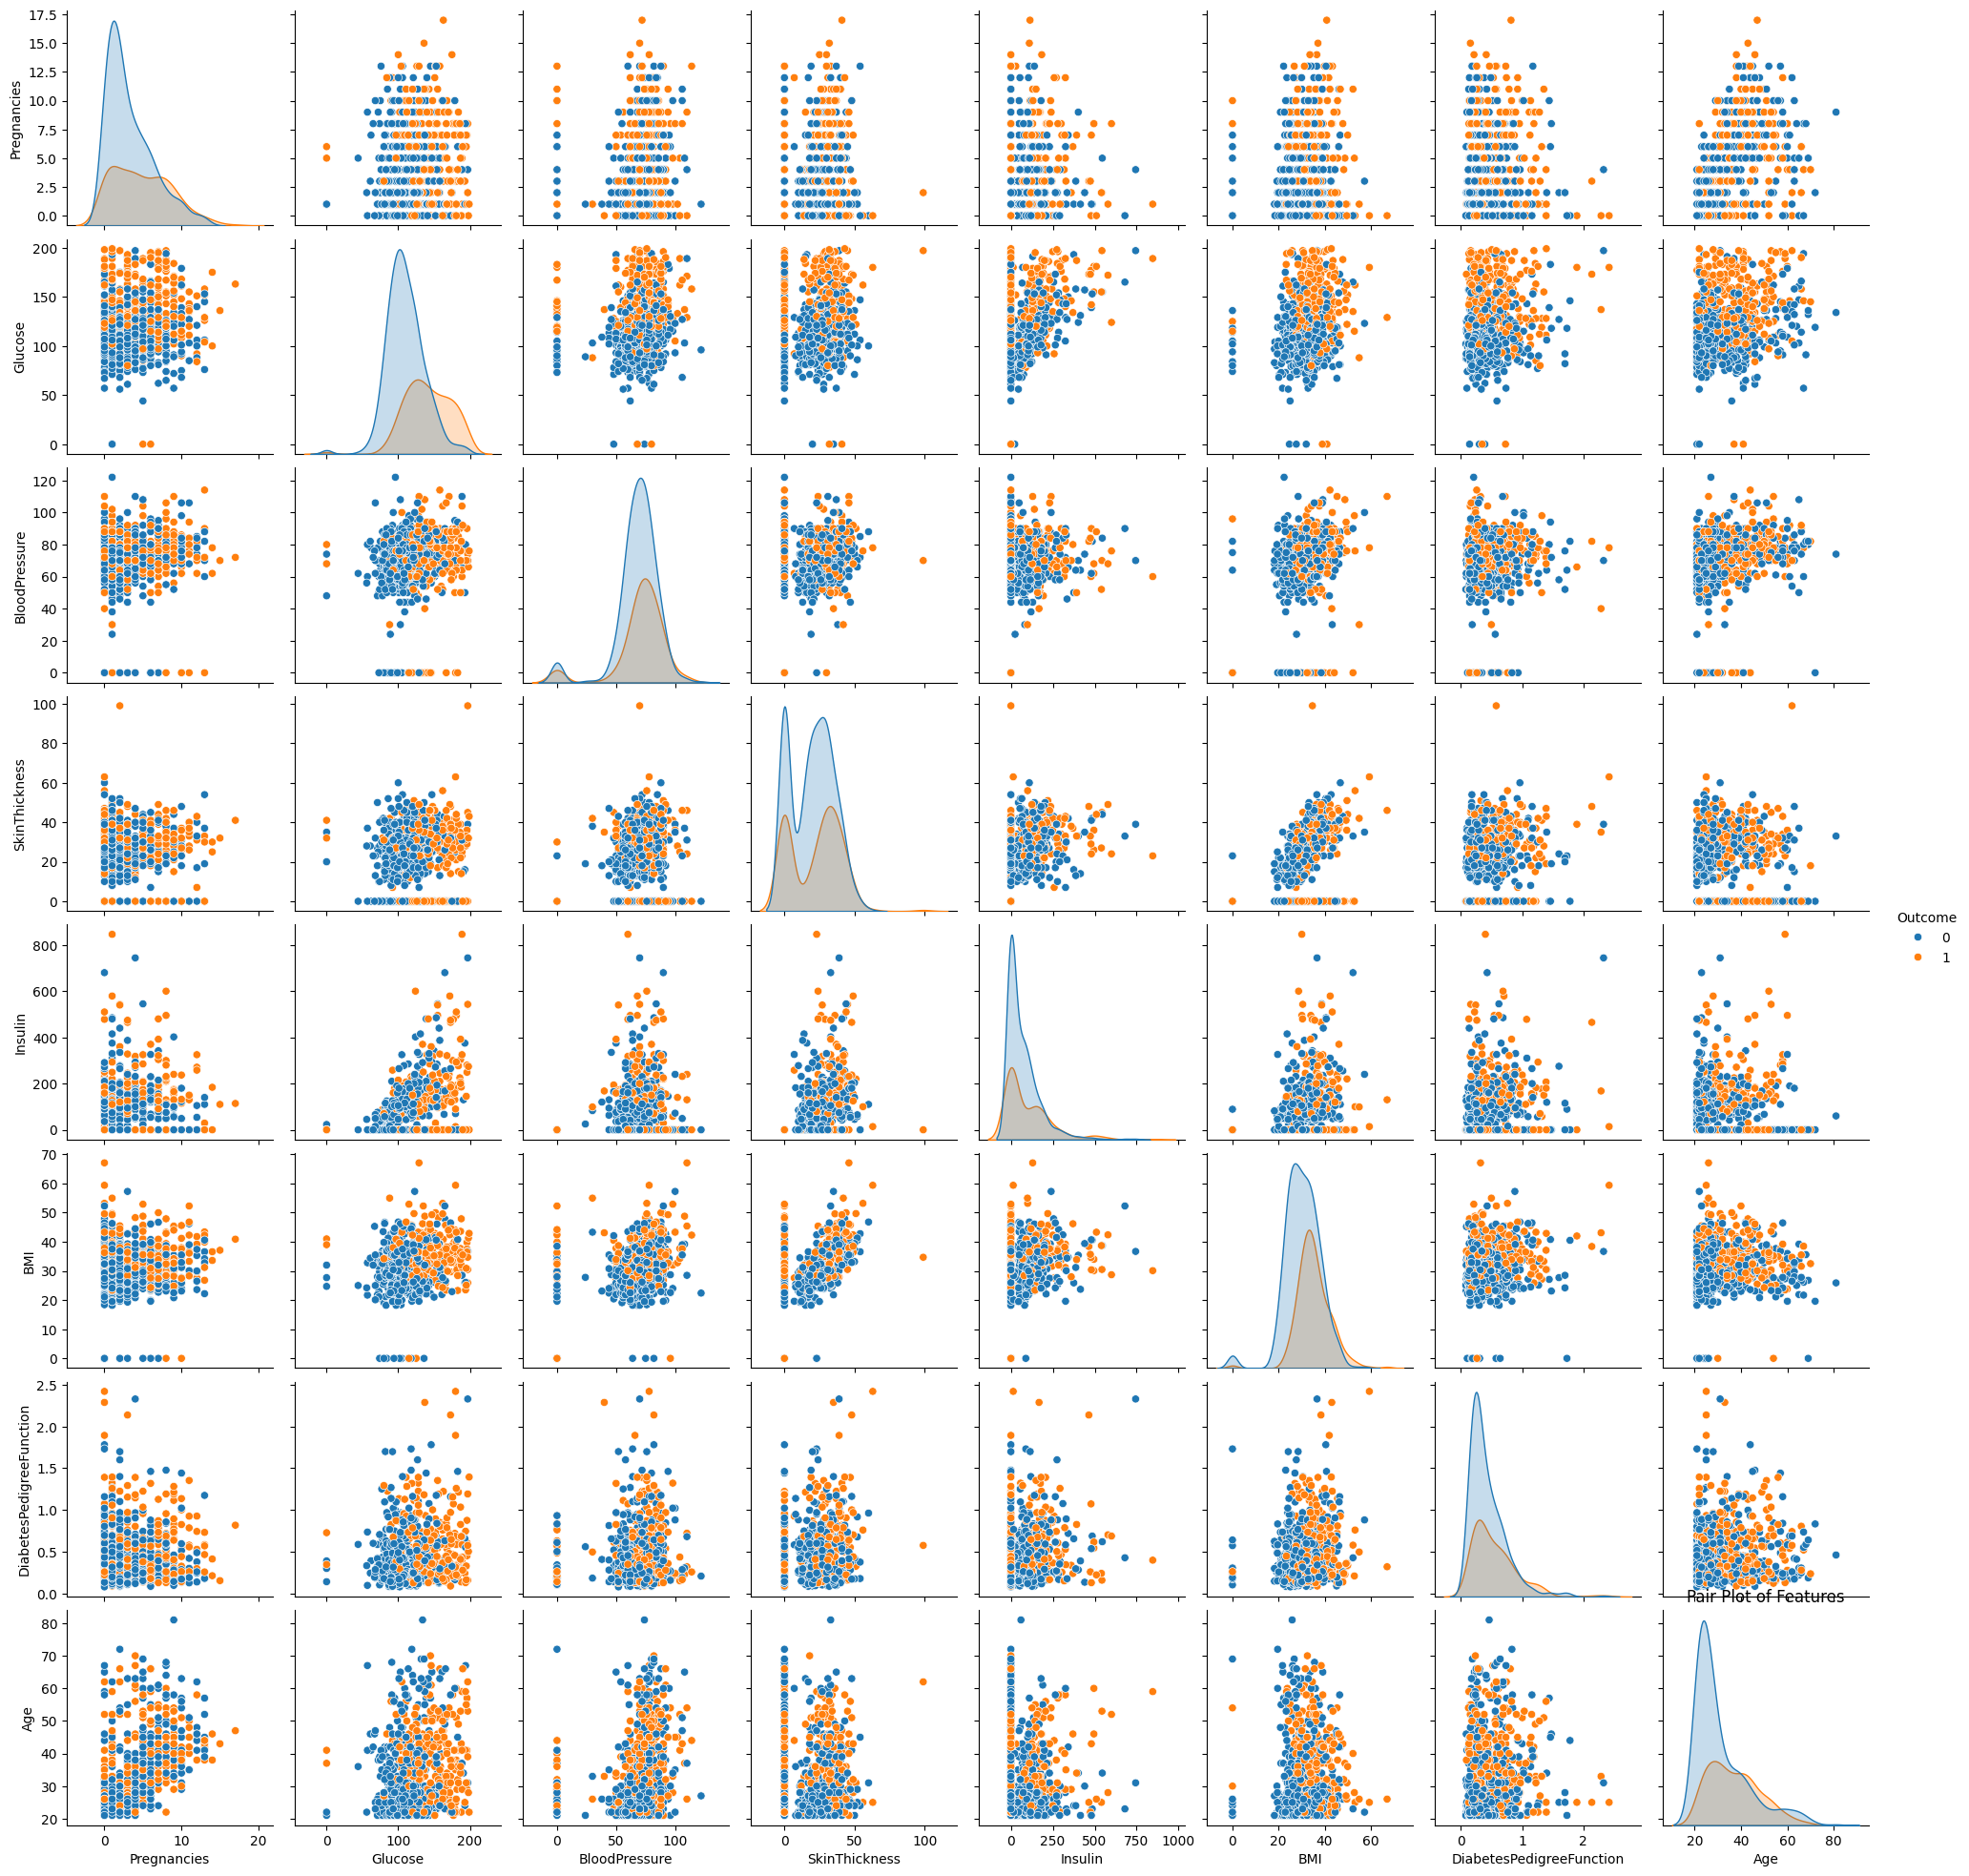

In [ ]:
# Pair plot to visualize relationships between features
sns.pairplot(df, hue='Outcome')
plt.title('Pair Plot of Features')
plt.show()


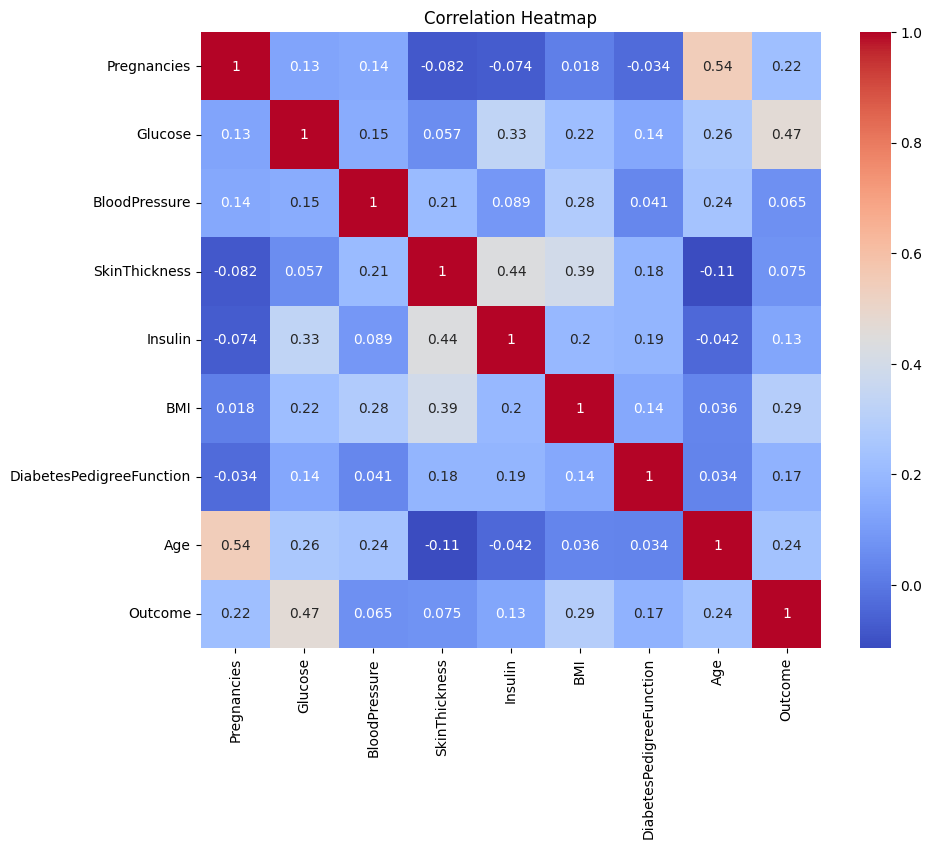

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


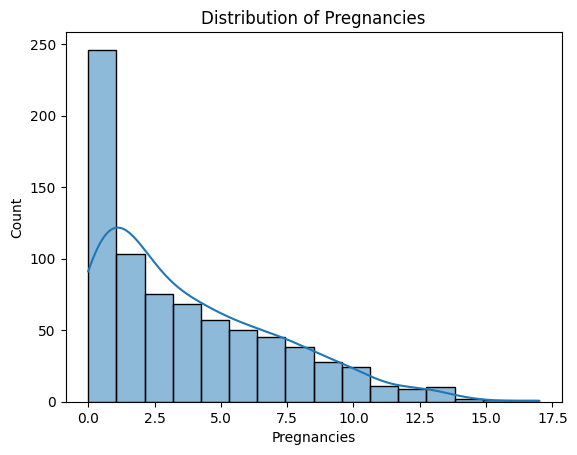

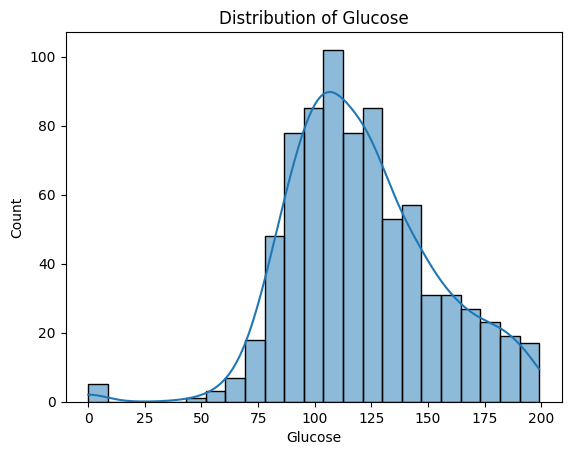

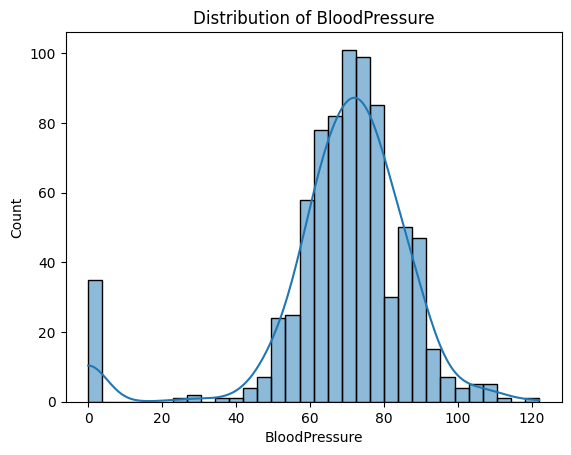

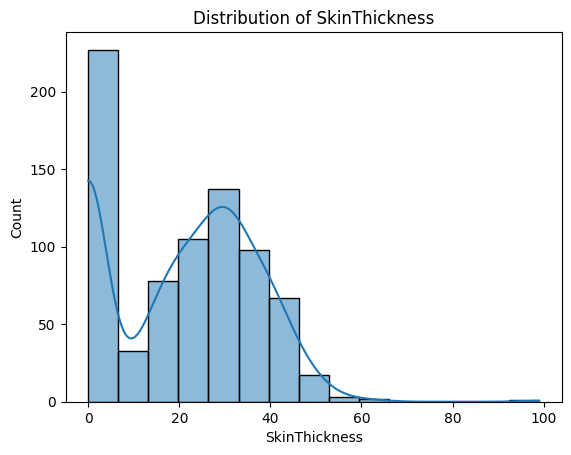

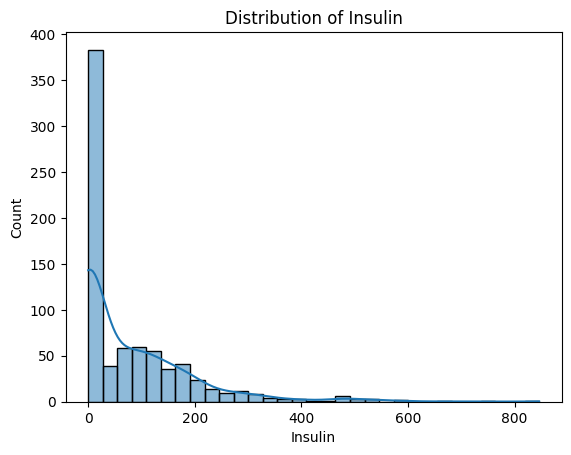

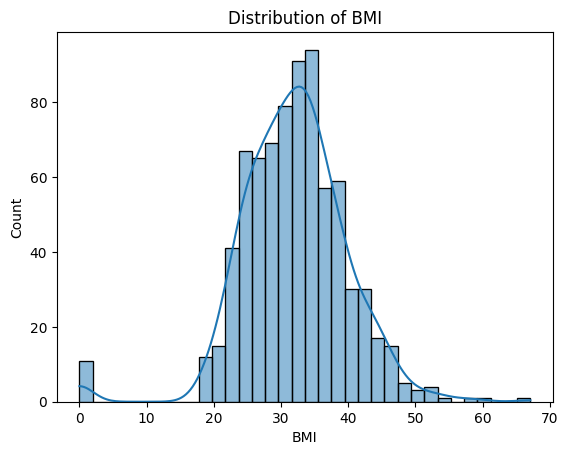

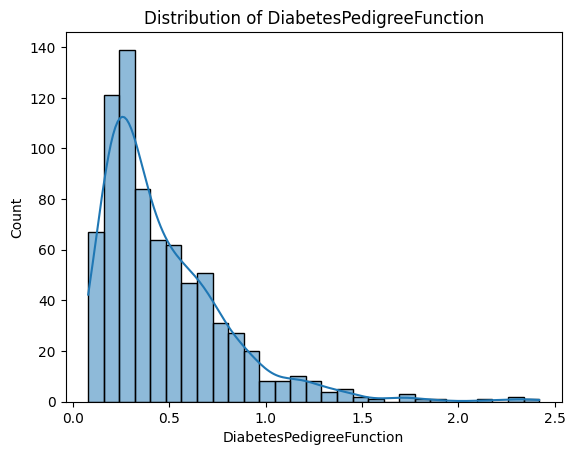

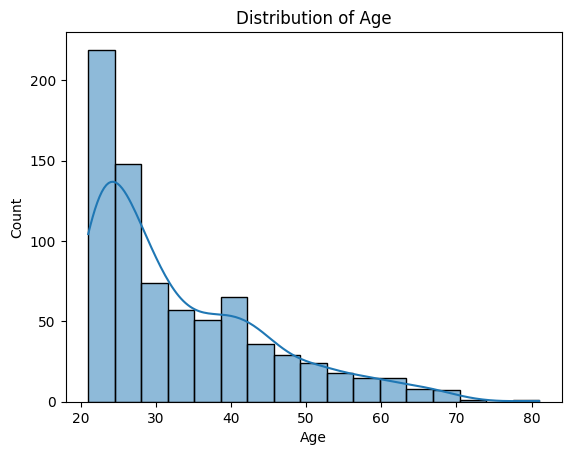

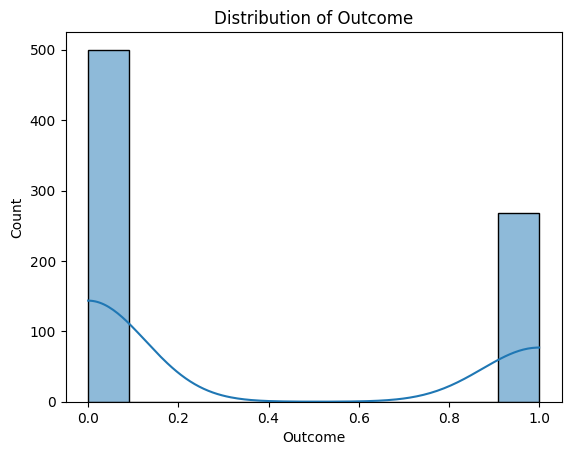

In [ ]:
# Distribution plots for numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in num_features:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


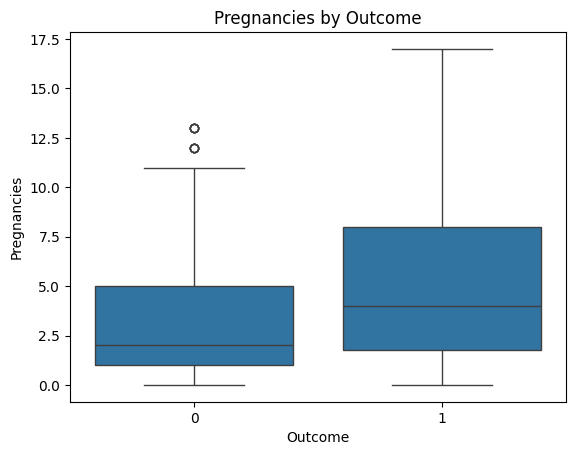

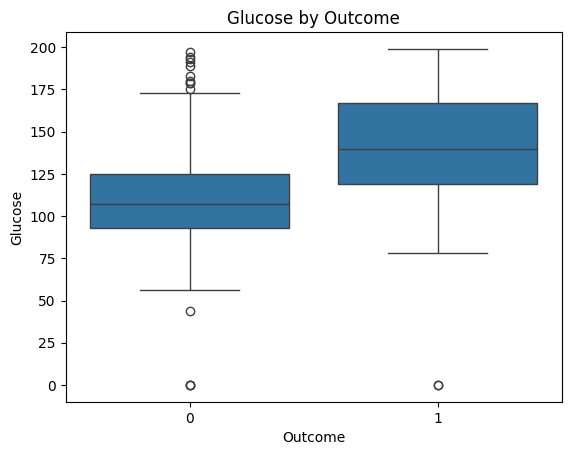

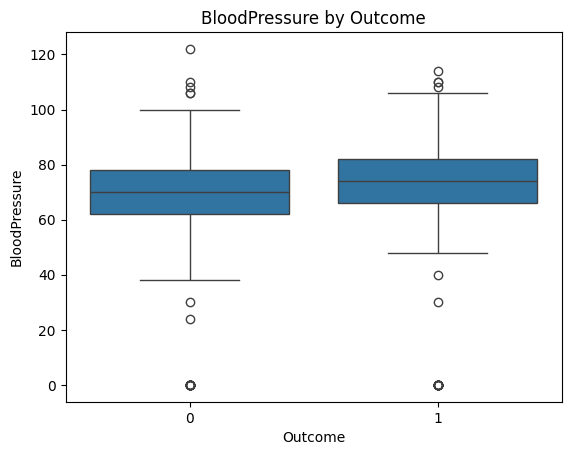

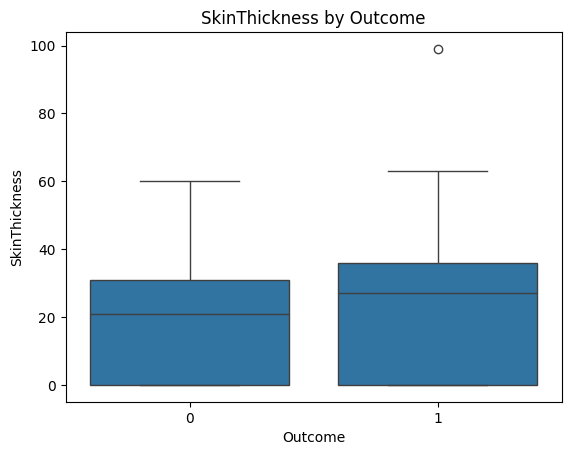

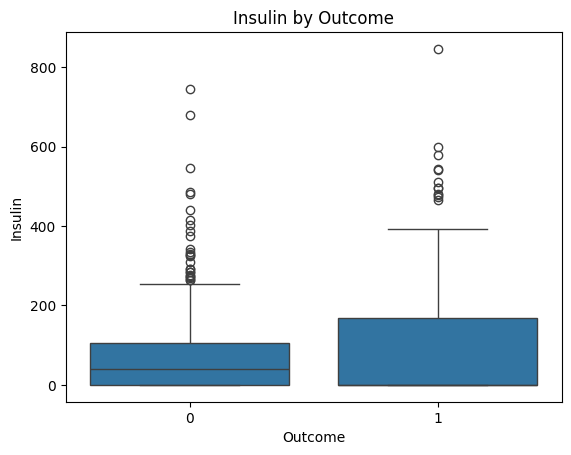

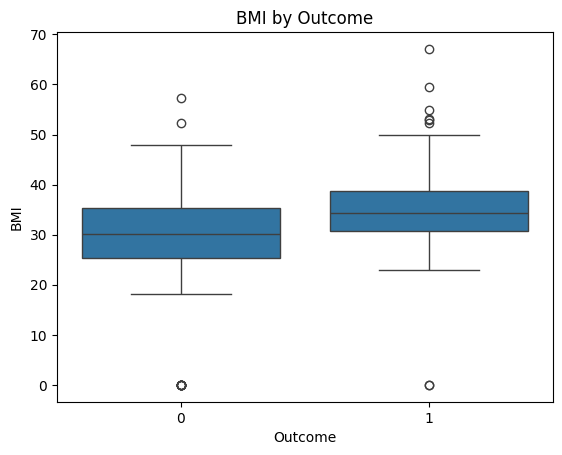

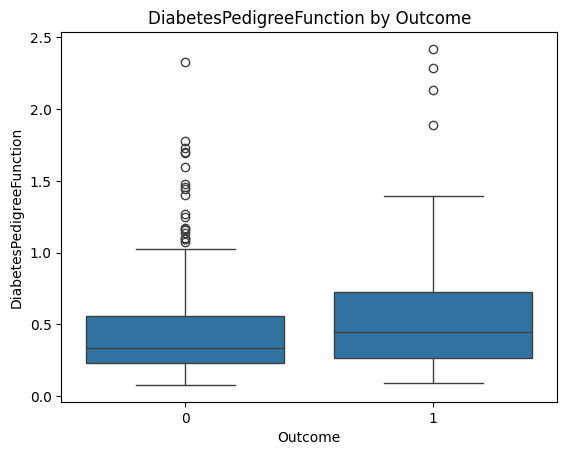

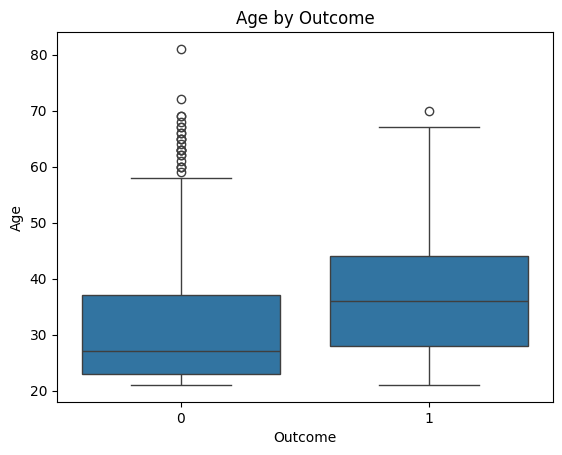

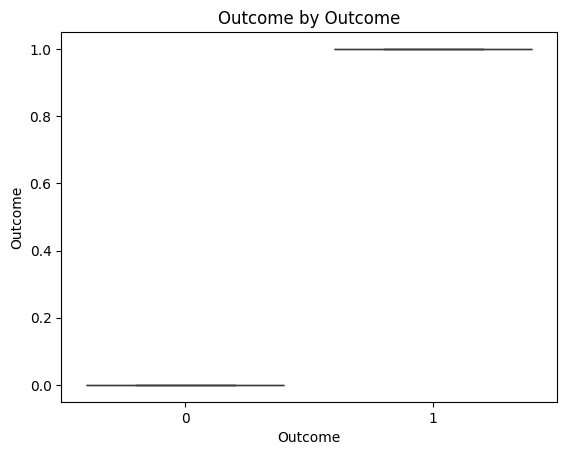

In [ ]:
for feature in num_features:
    plt.figure()
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} by Outcome')
    plt.show()


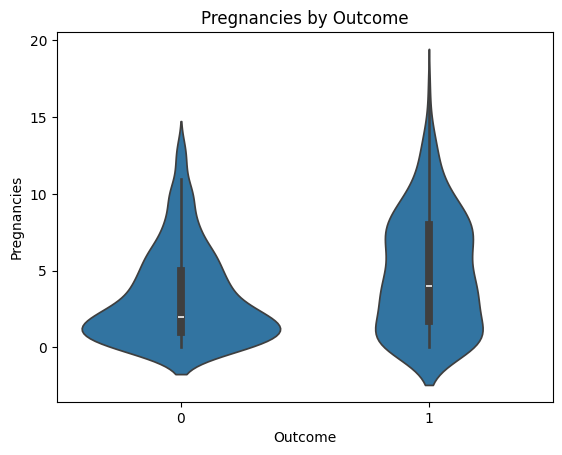

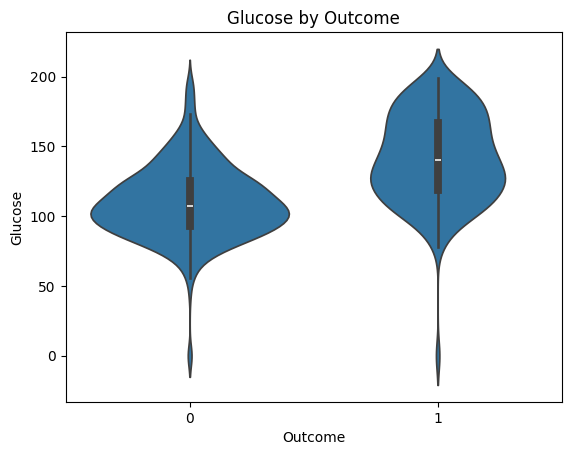

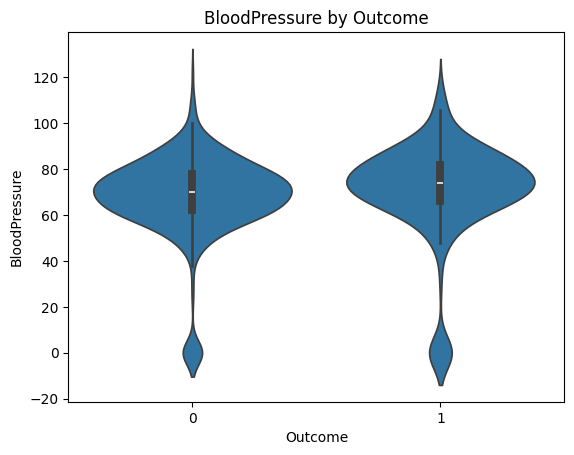

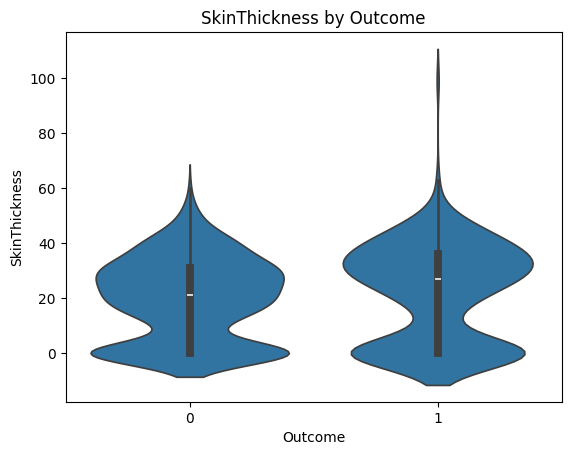

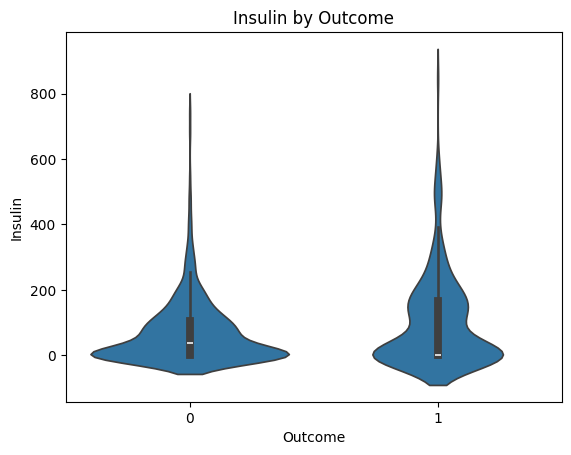

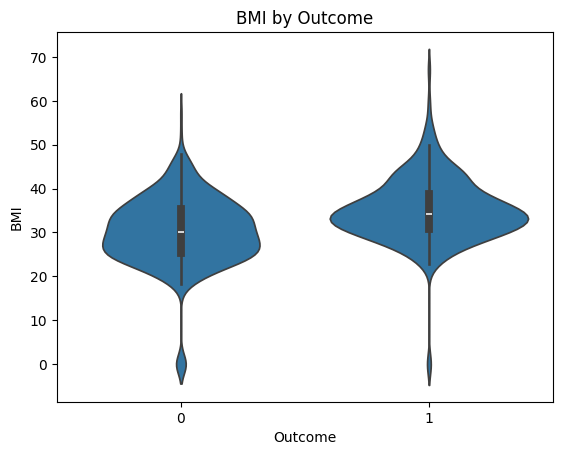

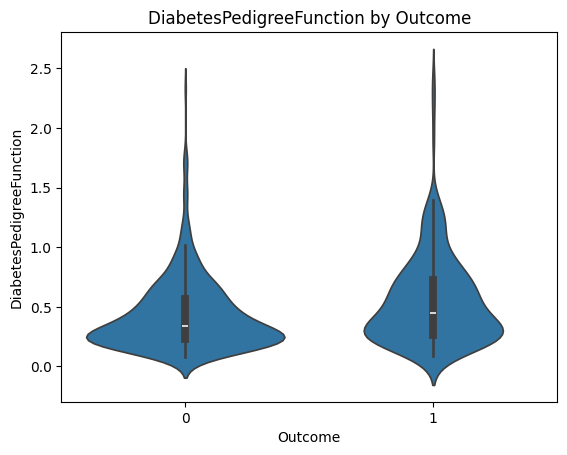

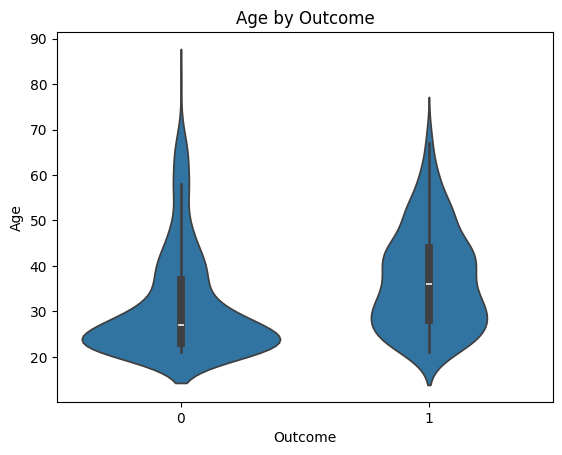

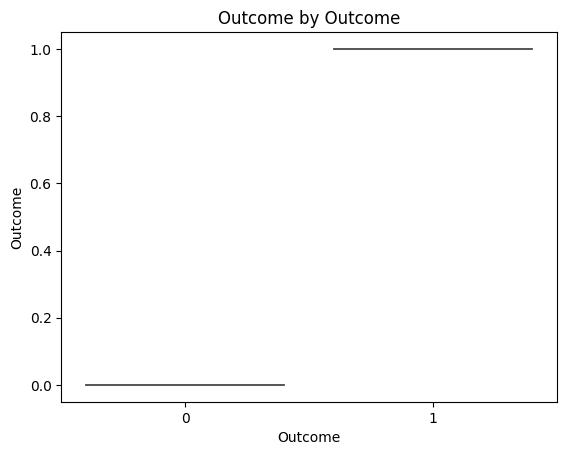

In [ ]:
for feature in num_features:
    plt.figure()
    sns.violinplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} by Outcome')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

[[79 20]
 [20 35]]
